In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  #import libraries

In [2]:
data = pd.read_csv('insurance.csv')
data.head(10) #read data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
data.duplicated().sum() #check duplicates

1

In [4]:
data.drop_duplicates(inplace = True)
data.duplicated().sum() #drop the duplicates

0

In [5]:
data.isnull().sum() #check null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.nunique() #no of unique values

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
data.dtypes #data types of column

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
data.info()  #info about data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


<Axes: xlabel='sex', ylabel='charges'>

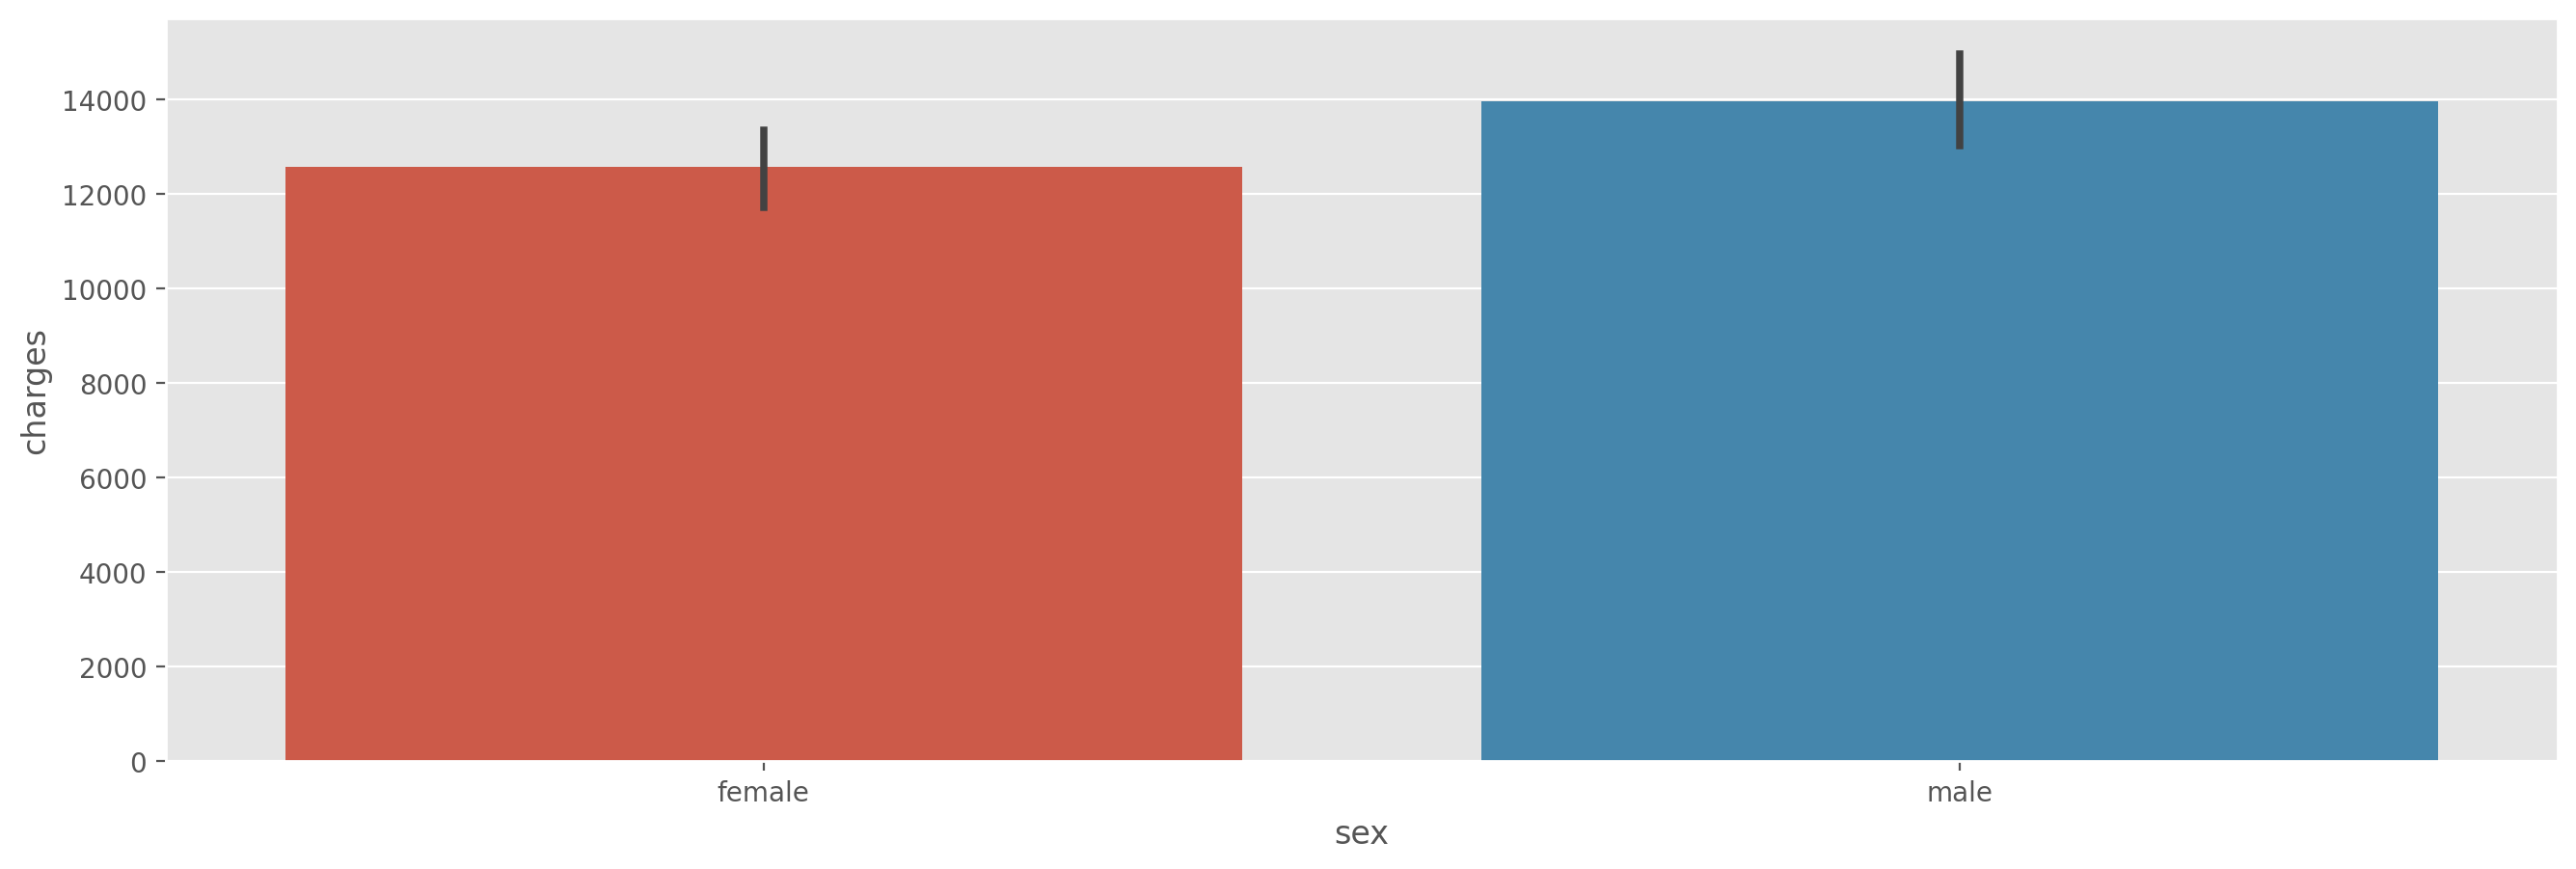

In [9]:
plt.figure(figsize = (16,5), dpi = 200)
sns.barplot(x='sex',y='charges',data = data) #male smokers have more charges

<Axes: xlabel='region', ylabel='charges'>

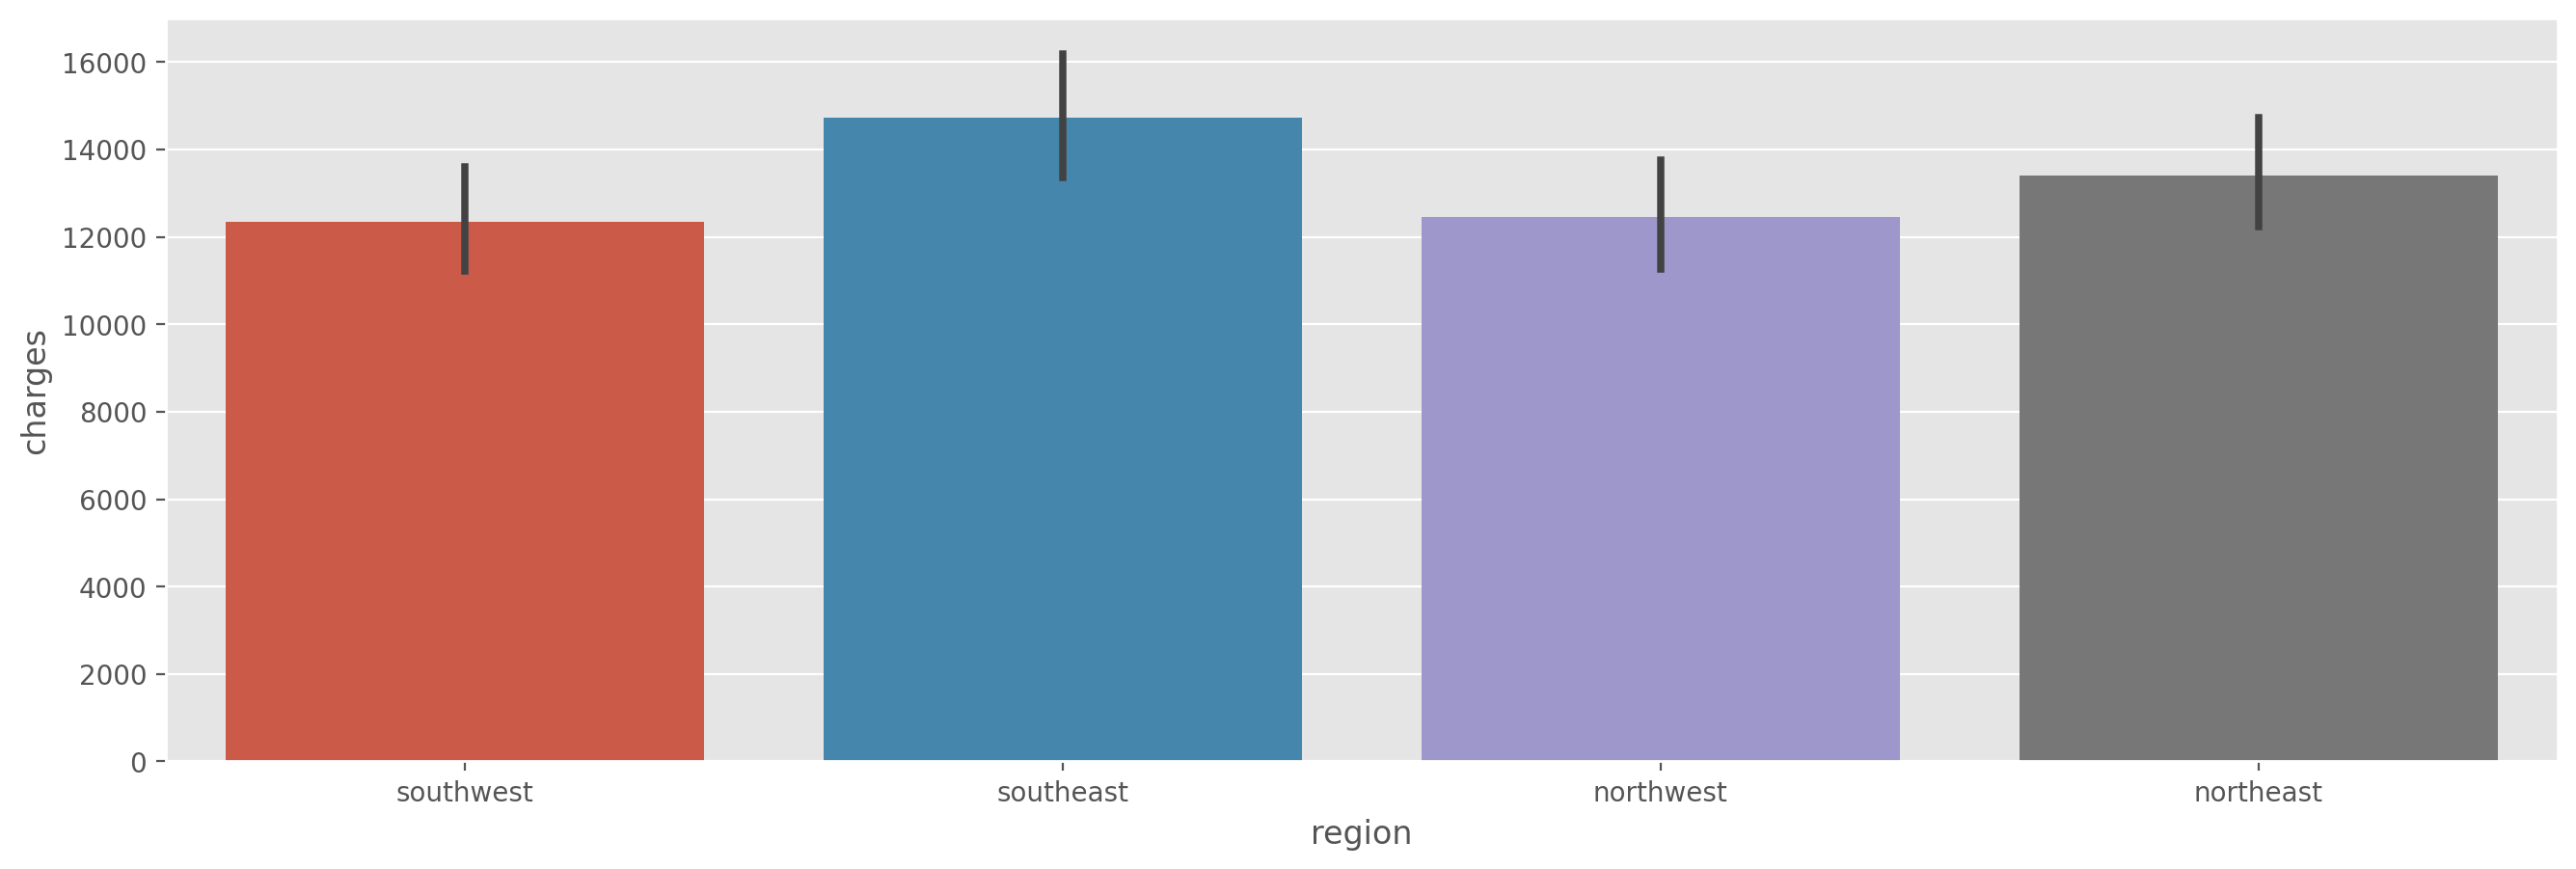

In [10]:
plt.figure(figsize = (16,5), dpi = 200)
sns.barplot(x='region',y='charges',data = data)  #southeast region charges are more

<Axes: xlabel='children', ylabel='charges'>

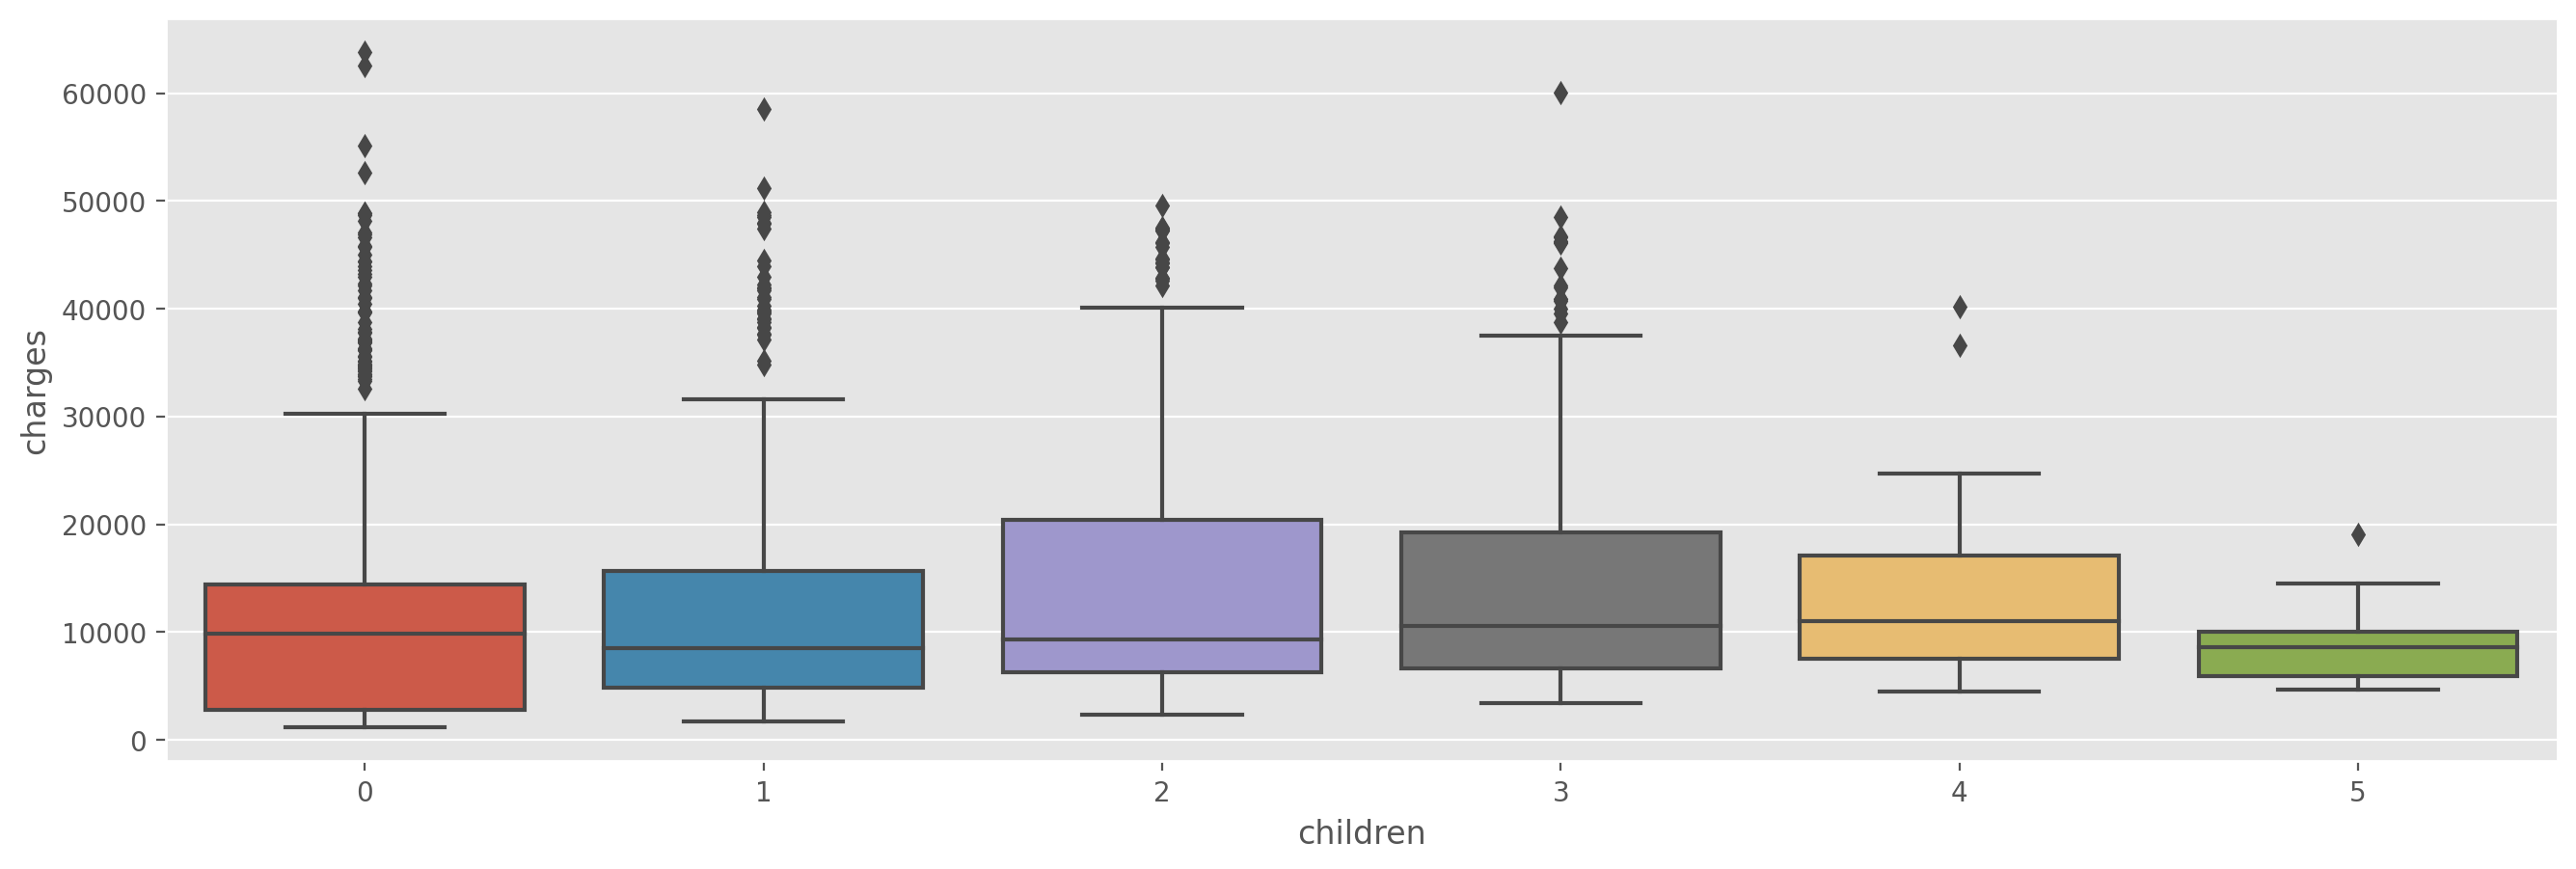

In [11]:
plt.figure(figsize = (16,5), dpi = 200)
sns.boxplot(x='children',y='charges',data = data) #agewise also charges varies

<Axes: xlabel='smoker', ylabel='count'>

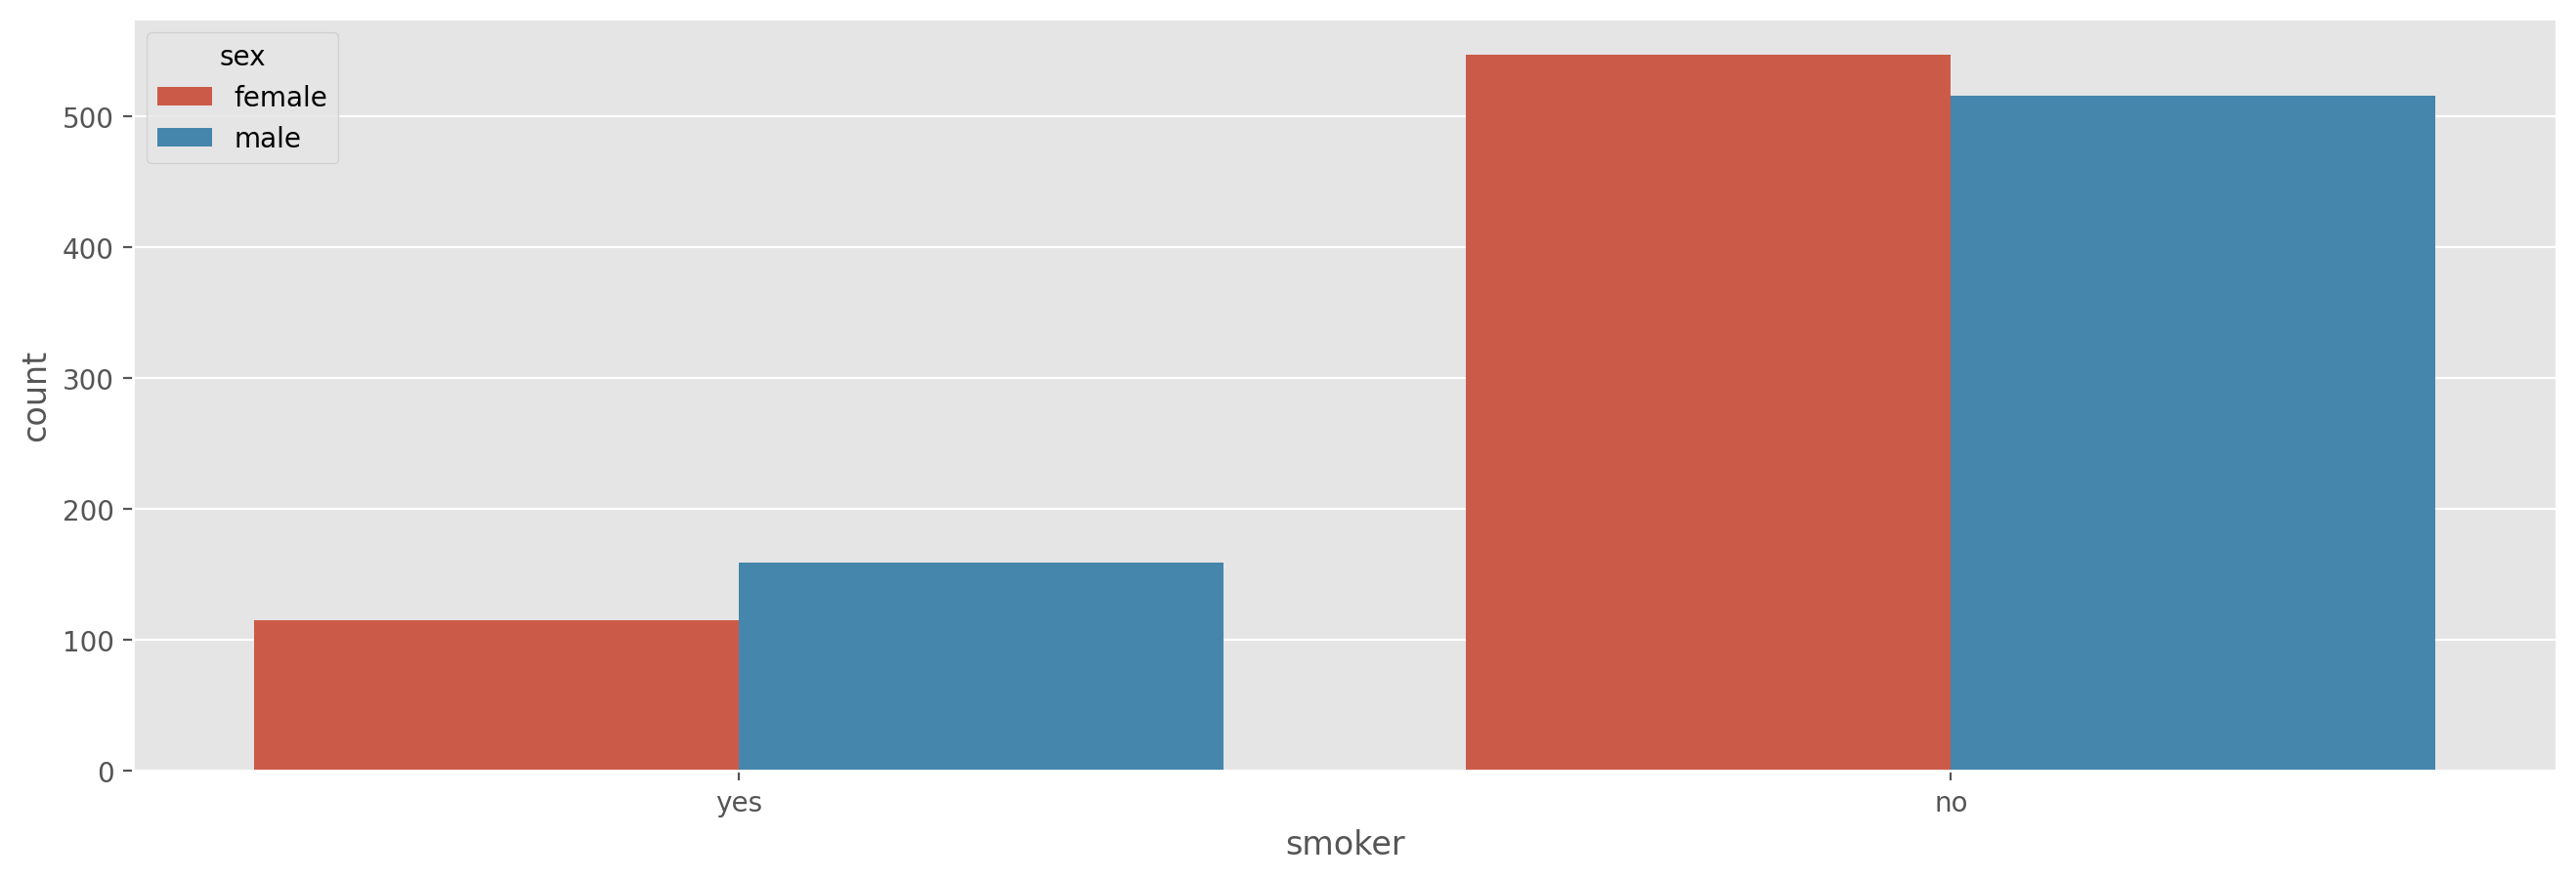

In [12]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='smoker',hue='sex',data = data) #male smokers are more

<Axes: xlabel='smoker', ylabel='charges'>

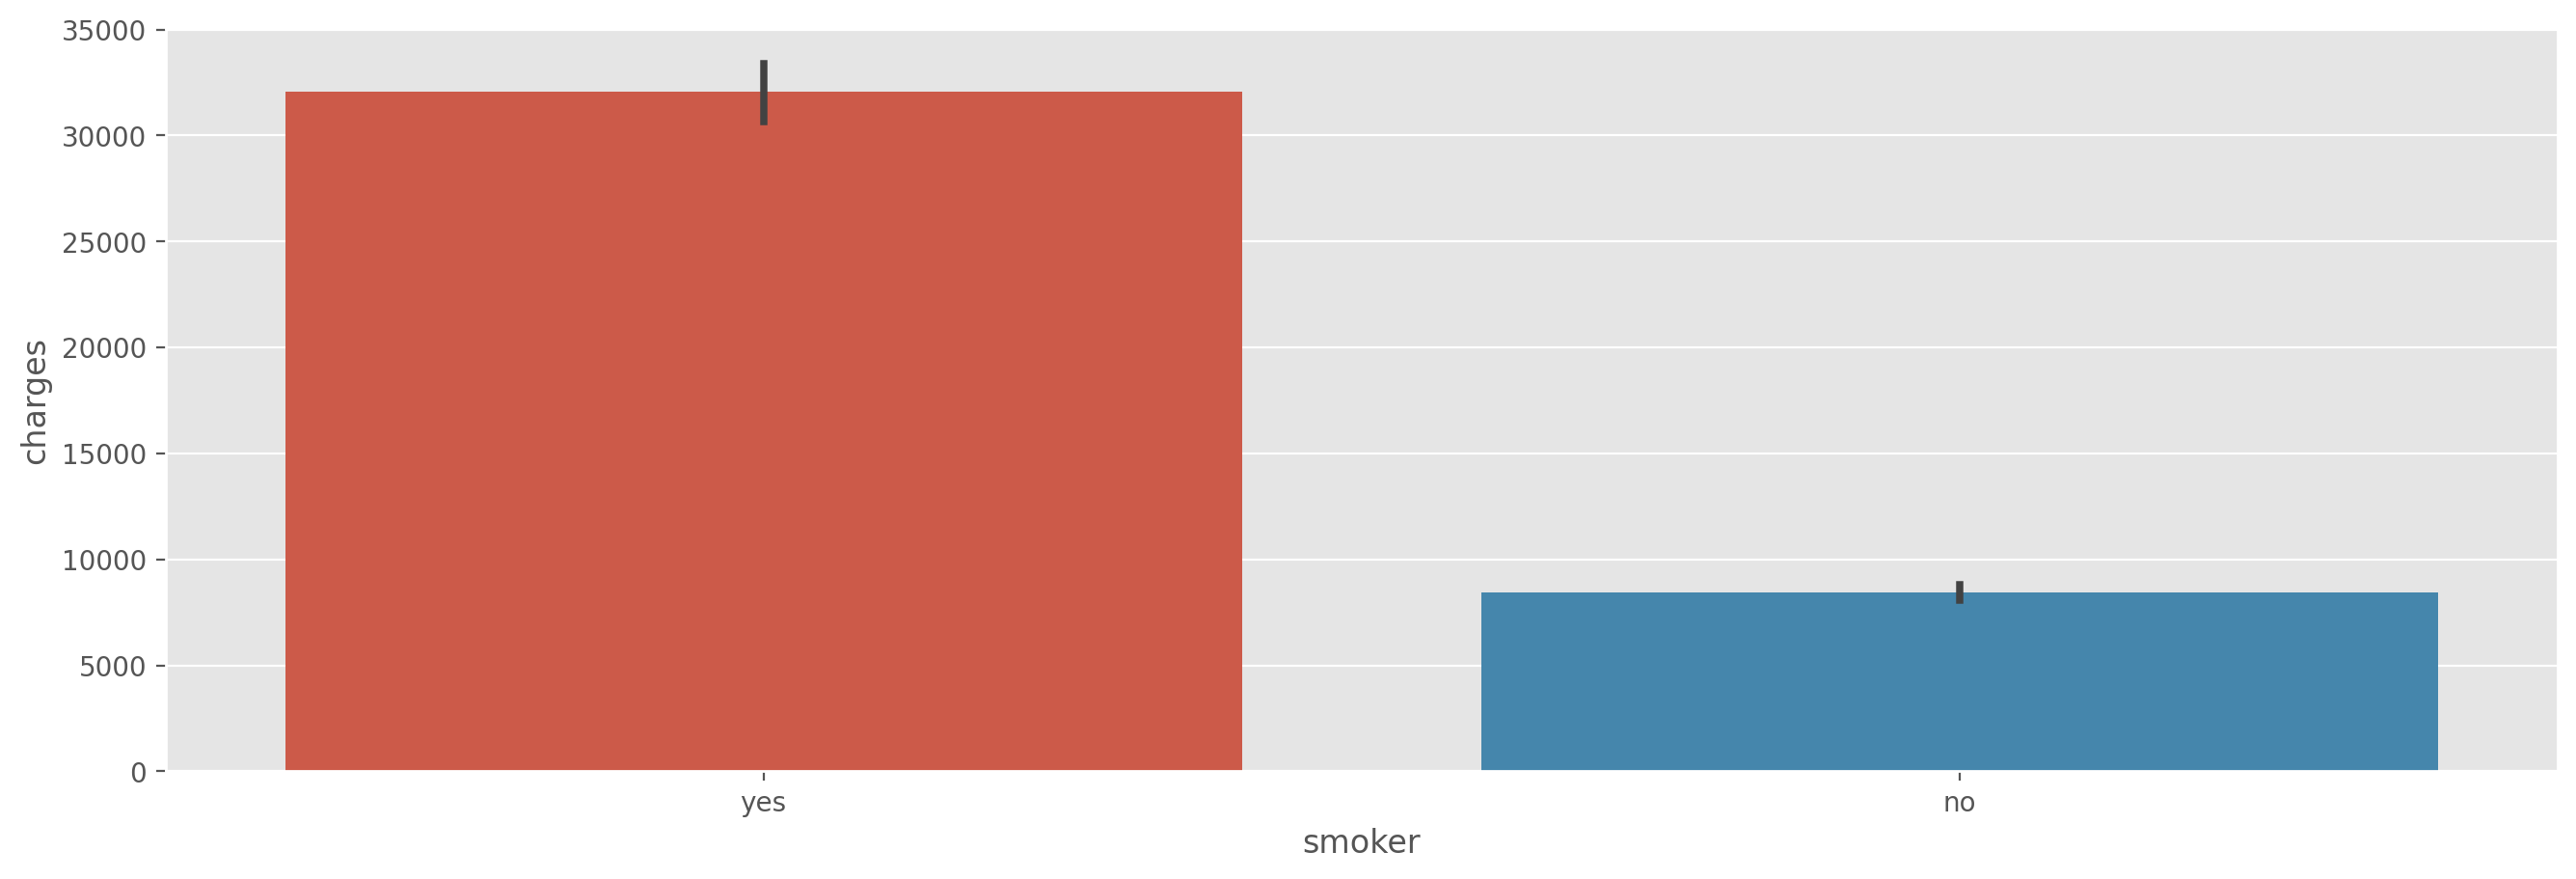

In [13]:
plt.figure(figsize = (16,5), dpi = 200)
sns.barplot(x='smoker',y='charges',data = data)  #smokers have more charges

<Axes: xlabel='age', ylabel='bmi'>

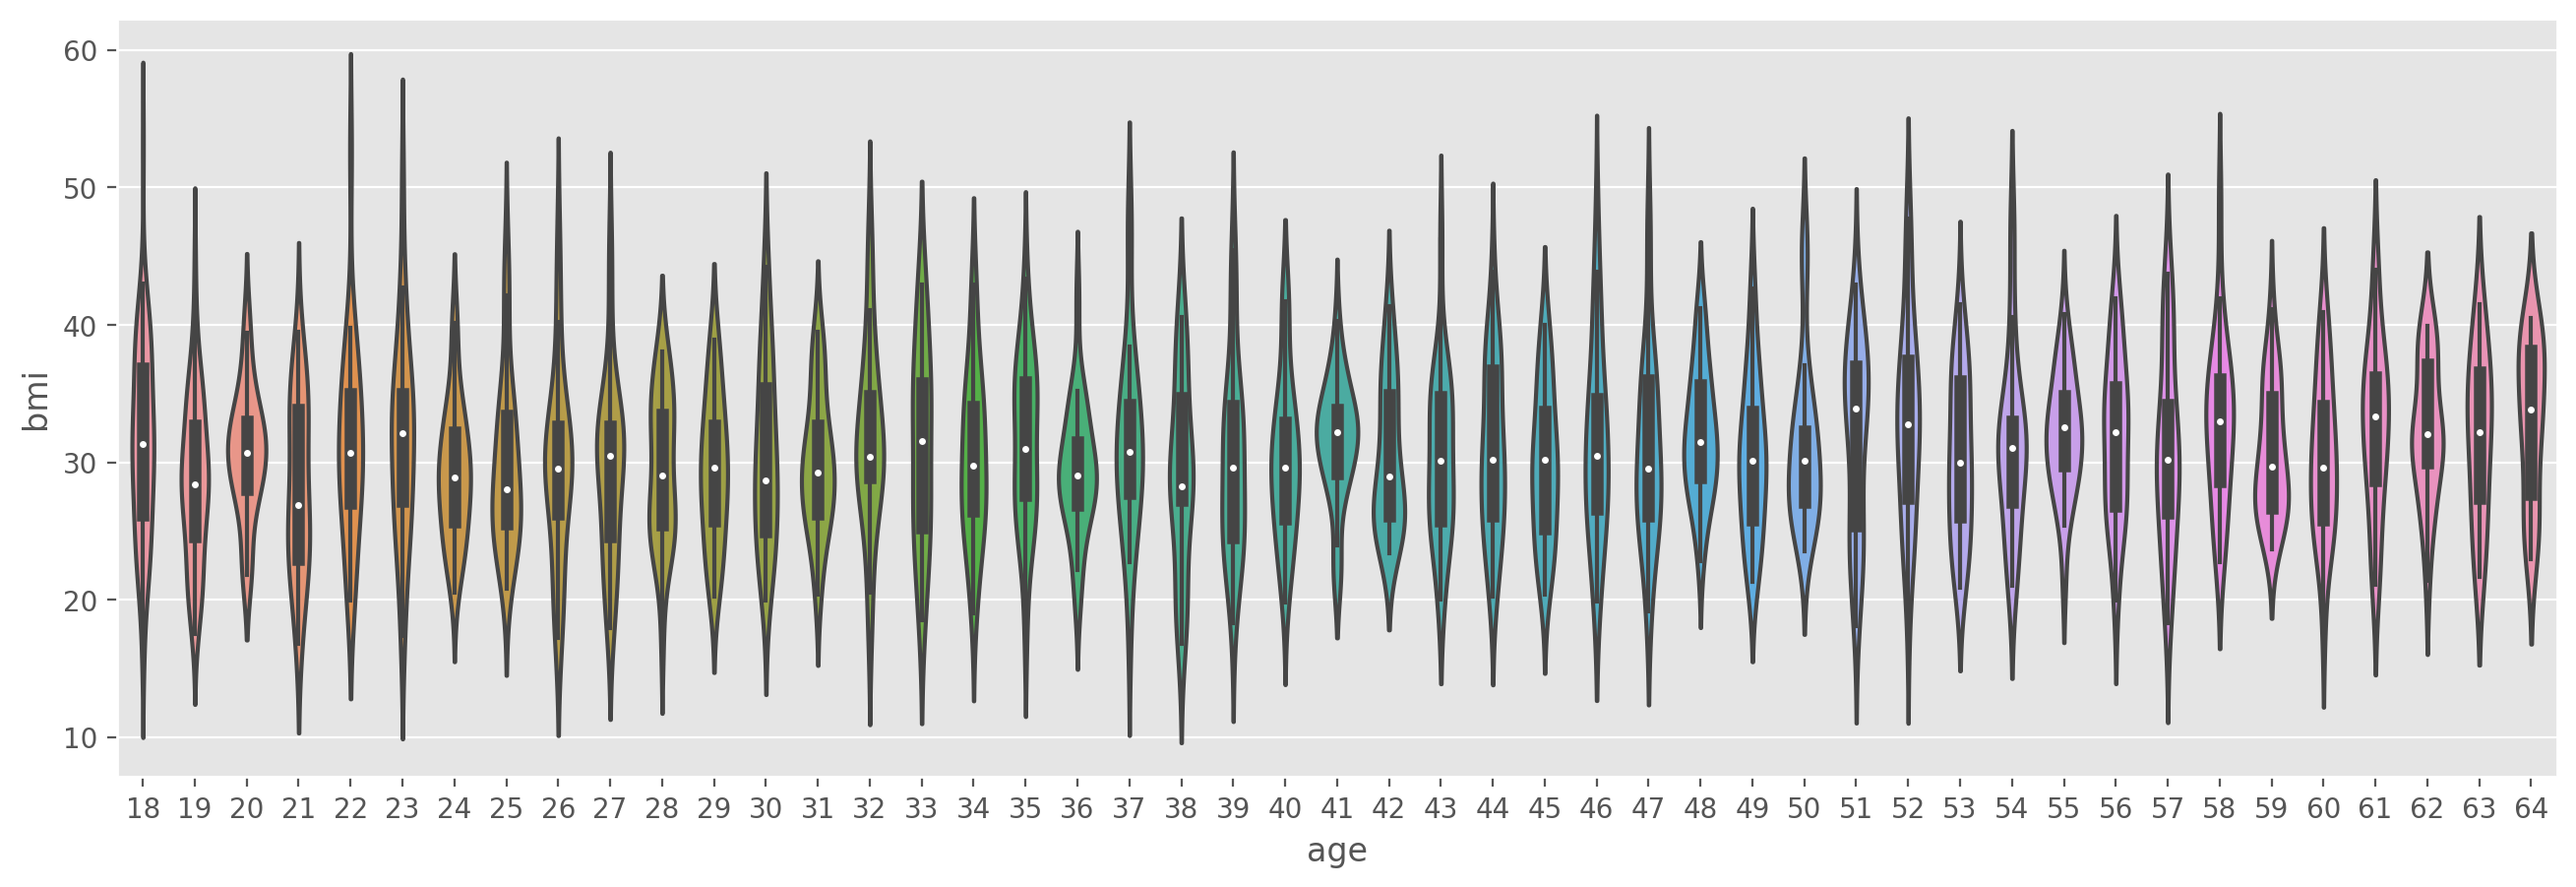

In [14]:
plt.figure(figsize = (16,5), dpi = 200)
sns.violinplot(x='age',y='bmi',data = data) #bmi depends on age as one of the factor 

<Axes: xlabel='age', ylabel='charges'>

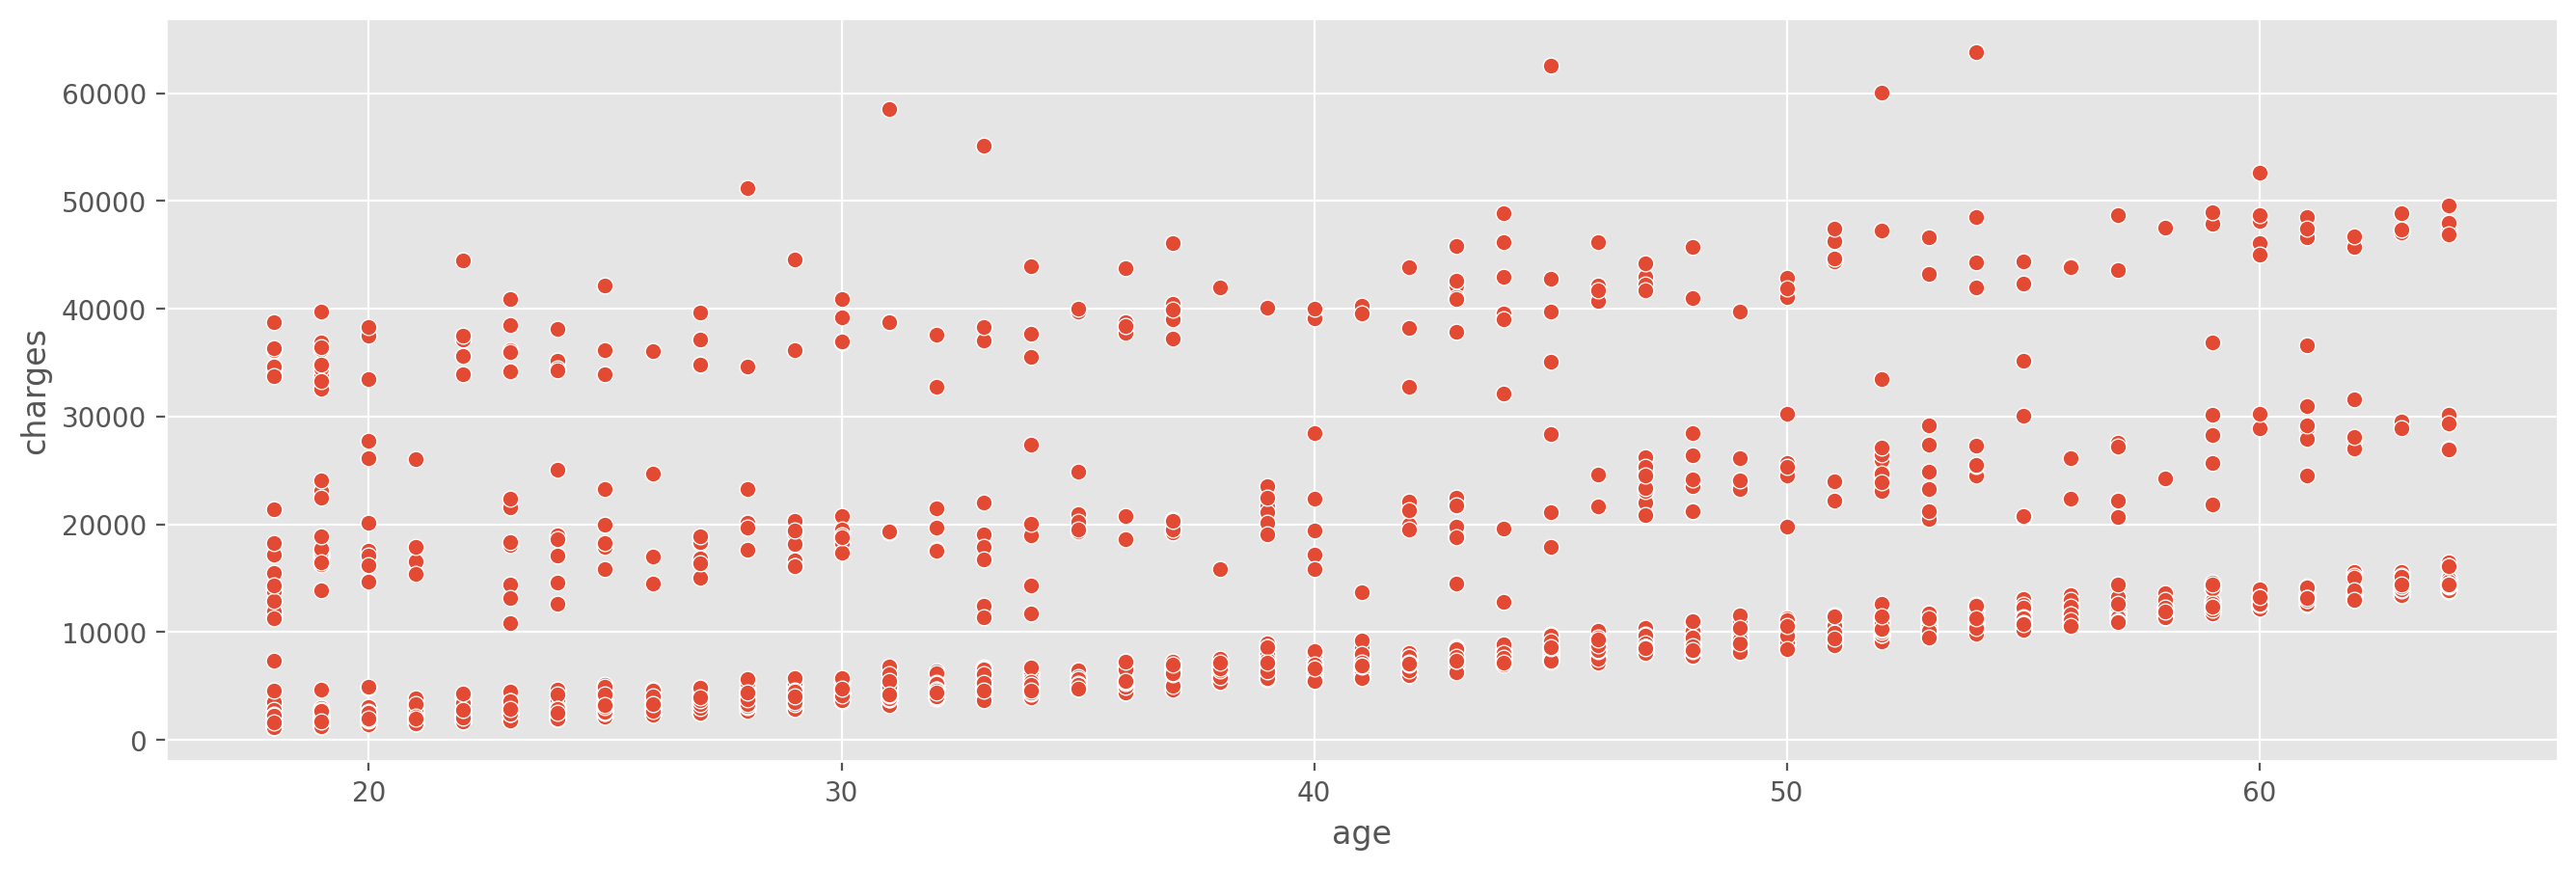

In [15]:
plt.figure(figsize = (16,5), dpi = 200)
sns.scatterplot(x='age',y='charges',data = data) #charges are more for aged people 

<Axes: xlabel='bmi', ylabel='charges'>

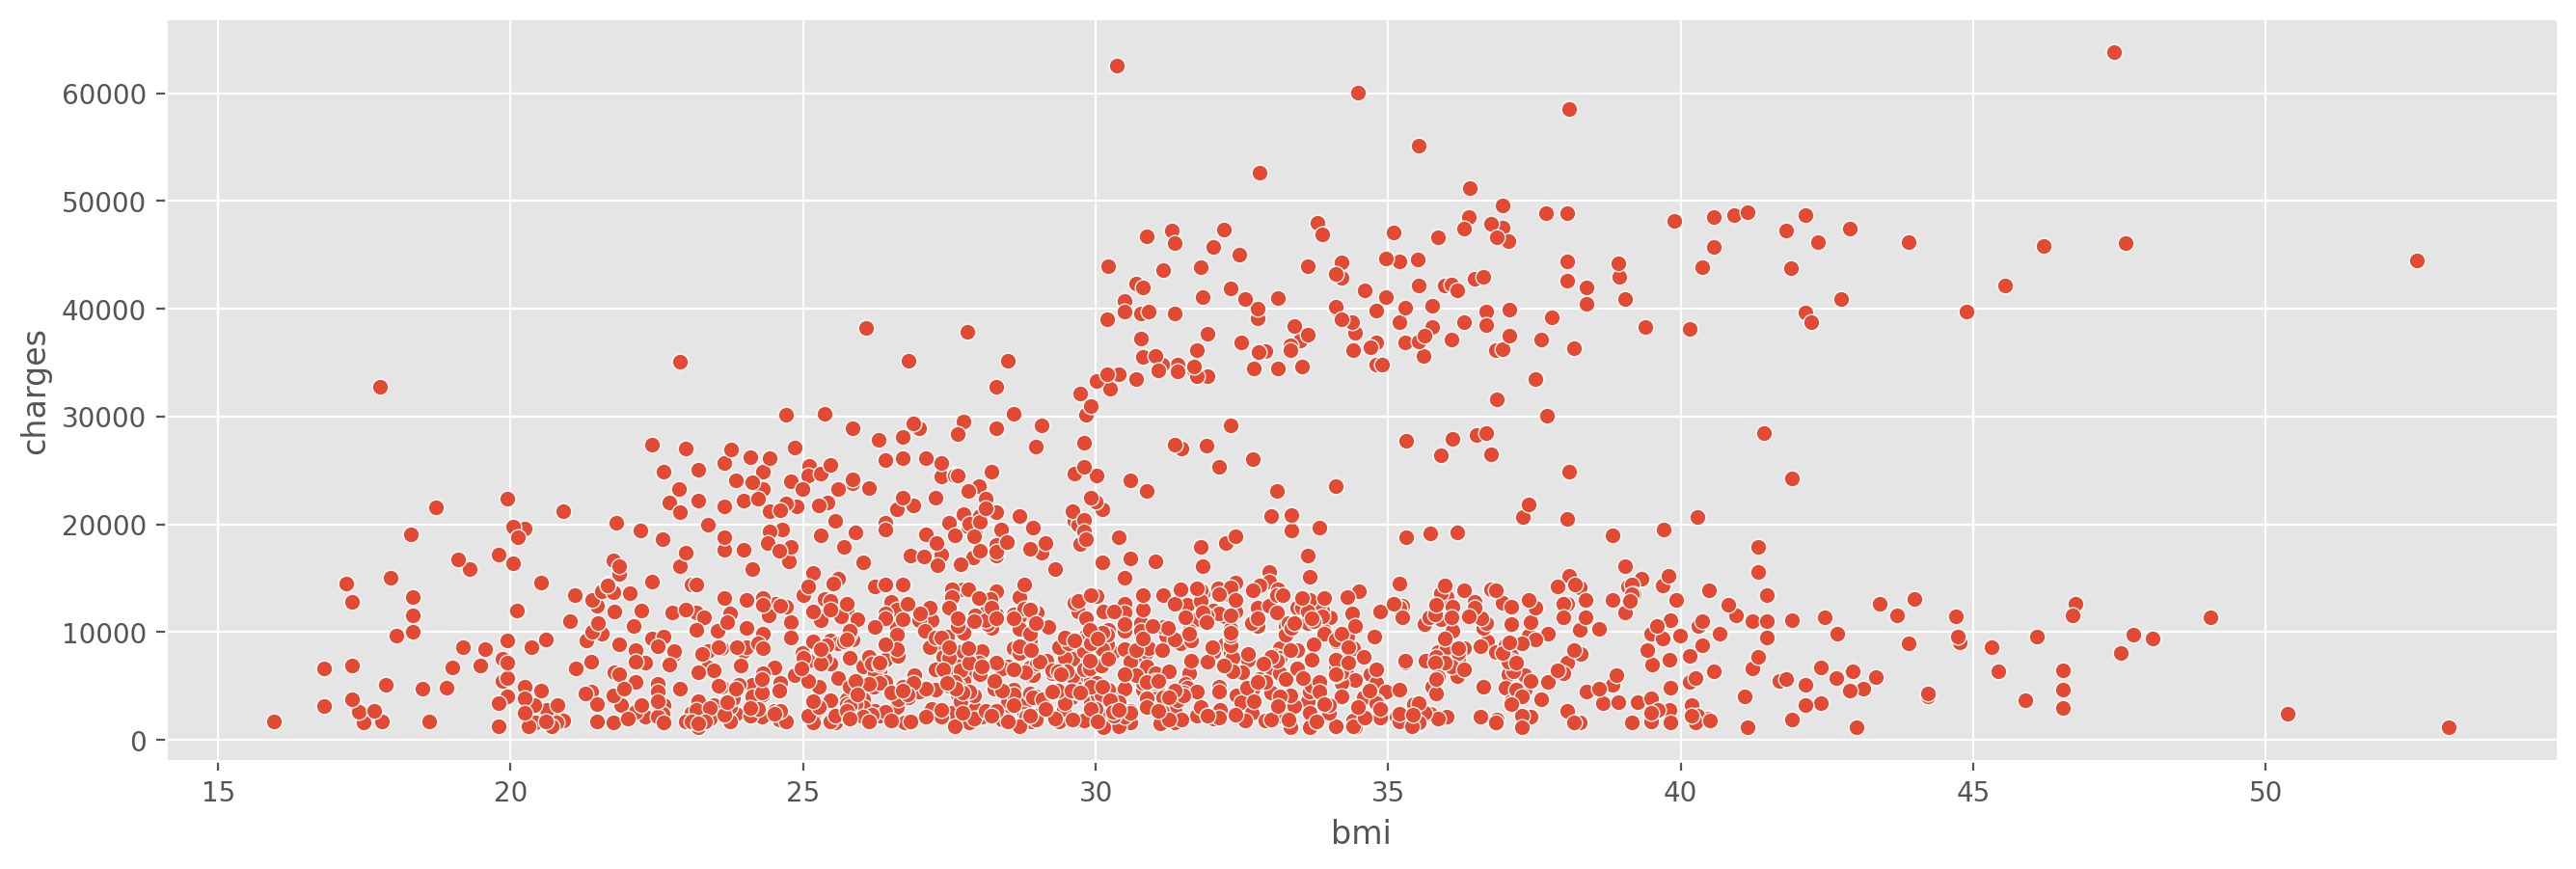

In [16]:
plt.figure(figsize = (16,5), dpi = 200)
sns.scatterplot(x='bmi',y='charges',data = data) #bmi affects charges as well

In [17]:
data.columns #no of columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
cols=[ 'age', 'sex','bmi','smoker','region','children']
X=data[cols]
Y=data[['charges']] #feature engineering

In [19]:
X.head(10) #Independent feature data shape

,age,sex,bmi,smoker,region,children
0,19,female,27.900,yes,southwest,0
1,18,male,33.770,no,southeast,1
2,28,male,33.000,no,southeast,3
3,33,male,22.705,no,northwest,0
4,32,male,28.880,no,northwest,0
5,31,female,25.740,no,southeast,0
6,46,female,33.440,no,southeast,1
7,37,female,27.740,no,northwest,3
8,37,male,29.830,no,northeast,2
9,60,female,25.840,no,northwest,0


In [20]:
Y.head() #dependent feature data shape

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [21]:
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape       : ', Y.shape) #print the shape of x and y 

Independent Feature Set Shape :  (1337, 6)
Dependent Feature Shape       :  (1337, 1)


In [22]:
# Splitting The Data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5) #split data for training & testing

In [23]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)  #print data of training & test data set

Training Data Shape   :  (935, 6)
Training Labels Shape :  (935, 1)
Testing Data Shape    :  (402, 6)
Testing Labels Shape  :  (402, 1)


In [24]:
# Encoding categorical data
cols = ['sex', 'smoker', 'region']
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# Fit on the training set
encoder.fit(x_train[cols])

# Transforming training and test sets
x_train[cols] = encoder.transform(x_train[cols])
x_test[cols] = encoder.transform(x_test[cols])

In [25]:
x_train.head()  #train data first few columns

,age,sex,bmi,smoker,region,children
646,39,1.0,26.220,0.0,1.0,1
630,53,1.0,36.100,0.0,3.0,1
582,39,1.0,45.430,0.0,2.0,2
444,56,1.0,26.695,1.0,1.0,1
651,53,0.0,39.600,0.0,2.0,1


In [26]:
x_test.head() #test data first few columns

,age,sex,bmi,smoker,region,children
299,48,0.0,28.88,0.0,1.0,1
803,18,0.0,42.24,1.0,2.0,0
51,21,0.0,33.63,0.0,1.0,2
399,18,0.0,38.17,0.0,2.0,0
370,61,0.0,21.09,0.0,1.0,0


In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train) #1.reg model to train

LinearRegression()

In [28]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)   #prediction

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))  # model performence



Training Set Score :  0.7518531561187278
Testing Set Score  :  0.7470464811109738


In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 18)
regressor.fit(x_train, y_train)#2.reg model 

DecisionTreeRegressor(max_depth=18)

In [32]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test) #prediction

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test)) #model performence

Training Set Score :  0.9999985326557882
Testing Set Score  :  0.7230215572794809


In [33]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors =5)
regressor.fit(x_train, y_train) #3.reg model

KNeighborsRegressor()

In [34]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test) #prediction

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test)) #model performence

Training Set Score :  0.4237417306191996
Testing Set Score  :  0.08373330205991647


In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, max_depth = 4, max_features =5)
regressor.fit(x_train , y_train) #4.reg model

RandomForestRegressor(max_depth=4, max_features=5, n_estimators=50)

In [36]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test) #prediction

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test)) #model performence 

Training Set Score :  0.8724415596325672
Testing Set Score  :  0.866886956525446


In [37]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 30, max_depth = 8)
regressor.fit(x_train, y_train) #4.reg model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)  #prediction
 
print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test)) #model performence

Training Set Score :  0.9928932904603379
Testing Set Score  :  0.8340620142514563


In [39]:
from lightgbm import LGBMRegressor
regressor = LGBMRegressor(n_estimators = 50)
regressor.fit(x_train, y_train) #5.reg model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 6
[LightGBM] [Info] Start training from score 13385.725400


LGBMRegressor(n_estimators=50)

In [40]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test) #prediction

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test)) #model performence

Training Set Score :  0.9178297602665115
Testing Set Score  :  0.8617860595810888


In [41]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(max_depth = 13, criterion = 'squared_error')

from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(estimator, n_estimators = 50)
regressor.fit(x_train, y_train) #6.reg model

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=13))

In [42]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)  #prediction

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test)) #model performence

Training Set Score :  0.9993141717430485
Testing Set Score  :  0.8162151794082674


In [43]:
from xgboost import XGBRegressor
regressor = XGBRegressor() #use XG model for hyperparameter tuning

In [44]:
search_params = {
    'n_estimators' : [10,20,30,40,50],
    'max_depth'    : [3,4,5,6,8,10],
    'max_features' : [3,4,5,6]
} #parameters

In [45]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = search_params,
                           scoring = ['r2'],
                           cv = 5,
                           refit = 'r2',
                           verbose = 1)
grid_search.fit(x_train, y_train) #tuning parameters 

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10],
                         'max_features': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50]},
             refit='r2', scoring=['r2'], verbose=1)

In [46]:
grid_search.best_params_ #best parameters

{'max_depth': 3, 'max_features': 3, 'n_estimators': 10}

In [47]:
grid_search.best_score_ #best scores

0.8533320009110217

In [48]:
best_model = grid_search.best_estimator_
best_model #best model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_features=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor() #2.best model for hyperparameter tuning

In [50]:
search_params = {
    'n_estimators' : [10,20,30,40,50],
    'max_depth'    : [3,4,5,6,8,10],
    'max_features' : [3,4,5,6]
} #parameters

In [51]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = search_params,
                           scoring = ['r2'],
                           cv = 5,
                           refit = 'r2',
                           verbose = 1)
grid_search.fit(x_train, y_train)#tuning parameters

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10],
                         'max_features': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50]},
             refit='r2', scoring=['r2'], verbose=1)

In [52]:
grid_search.best_params_ #best parameters

{'max_depth': 4, 'max_features': 5, 'n_estimators': 50}

In [53]:
grid_search.best_score_ #best score

0.8510012026585649

In [54]:
best_model = grid_search.best_estimator_
best_model #best model

RandomForestRegressor(max_depth=4, max_features=5, n_estimators=50)

In [55]:
from xgboost import XGBRegressor
regressor = XGBRegressor() #use this model for another method hyperparameter tuning

In [56]:
search_params = {
    'n_estimators' : [10,20,30,40,50],
    'max_depth'    : [3,4,5,6,8,10],
    'max_features' : [3,4,5,6]
} #parameters

In [57]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator = regressor,
                                       param_distributions = search_params,
                                       scoring = ['r2'],
                                       cv = 5,
                                       refit = 'r2',
                                       n_iter = 20,
                                       verbose = 3)
randomized_search.fit(x_train, y_train) #tuning parameters

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.715) total time=   0.0s
[CV 2/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.755) total time=   0.0s
[CV 3/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.806) total time=   0.0s
[CV 4/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.798) total time=   0.0s
[CV 5/5] END max_depth=8, max_features=4, n_estimators=40; r2: (test=0.828) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=6, n_estimators=50; r2: (test=0.779) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=6, n_estimators=50; r2: (test=0.811) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=6, n_estimators=50; r2: (test=0.852) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=6, n_estimators=50; r2: (test=0.817) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=6, n_estimators=50; r2: (test=0.857) total t

[CV 4/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.836) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.889) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=4, n_estimators=40; r2: (test=0.765) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=4, n_estimators=40; r2: (test=0.804) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=4, n_estimators=40; r2: (test=0.825) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=4, n_estimators=40; r2: (test=0.808) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=4, n_estimators=40; r2: (test=0.855) total time=   0.0s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 4, 5, 6, 8, 10],
                                        'max_features': [3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   refit='r2', scoring=['r2'], verbose=3)

In [58]:
randomized_search.best_params_ #best parmeters

{'n_estimators': 10, 'max_features': 5, 'max_depth': 3}

In [59]:
randomized_search.best_score_ #best score

0.8533320009110217

In [60]:
best_model = randomized_search.best_estimator_
best_model #best model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_features=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_test)  #1.evaluating model by evaluating metrics 

2196.6417071850324

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test) #2.evaluating model by evaluating metrics 

26840937.243573643

In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test, squared = False) #3.evaluating model by evaluating metrics 

5180.823992722938

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_test)  #4.evaluating model by evaluating metrics 

0.8162151794082674